In [2]:
import numpy as np
import pandas as pd
import scipy.stats as si
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.optimize import root, minimize
#Expiry/Strike  1M     3M
#10DP           32.25% 28.36%
#25DP           24.73% 21.78%
#40DP           20.21% 18.18%
#50D            18.24% 16.45%
#40DC           15.74% 14.62%
#25DC           13.70% 12.56%
#10DC           11.48% 10.94%
def BS_C(K, sigma, T):
    d1 = (np.log(100/K) + (sigma**2/2)*T) / (sigma*T**0.5)
    d2 = d1 - sigma*T**0.5
    return(si.norm.cdf(d1)*100 - si.norm.cdf(d2)*K)

def K_c (delta, sigma, T):
    #si.norm.ppf(si.norm.cdf(num)) = num
    a = sigma**2/2*T - sigma*T**0.5*si.norm.ppf(delta)
    K = 100*np.exp(a)
    return K

def K_p (delta, sigma, T):
    a = sigma**2/2*T + sigma*T**0.5*si.norm.ppf(delta)
    K = 100*np.exp(a)
    return K

print(K_p(0.1, 0.3225, 1/12),
    K_p(0.1, 0.2836, 3/12),
    K_p(0.25, 0.2473, 1/12),
    K_p(0.25, 0.2178, 3/12),
    K_p(0.4, 0.2021, 1/12),
    K_p(0.4, 0.1818, 3/12),
    K_p(0.5, 0.1824, 1/12),
    K_p(0.5, 0.1645, 3/12))
print(K_c(0.4, 0.1574, 1/12),
    K_c(0.4, 0.1462, 3/12),
    K_c(0.25, 0.1370, 1/12),
    K_c(0.25, 0.1256, 3/12),
    K_c(0.1, 0.1148, 1/12),
    K_c(0.1, 0.1094, 3/12))

89.13875823740656 84.2256741986612 95.54210250696691 93.47068495041225 98.70064200875633 98.1279598096663 100.13872012748033 100.33882584645019
101.26227346895308 102.14176121600306 102.78375149234682 104.53271266770041 104.39583816855951 107.42222545888309


[-0.01378846  1.55779466] [-0.00767564  0.93244064]


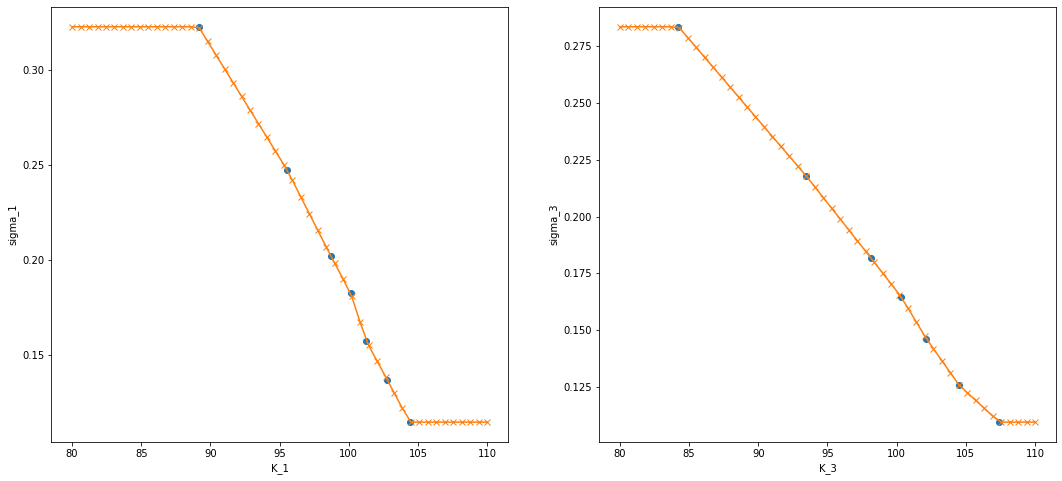

In [3]:
#(b) sigma ~ K
sigma_1 = [0.3225, 0.2473, 0.2021, 0.1824, 0.1574, 0.1370, 0.1148]
sigma_3 = [0.2836, 0.2178, 0.1818, 0.1645, 0.1462, 0.1256, 0.1094]
K_1 =     [89.14, 95.54, 98.70, 100.14, 101.26, 102.78, 104.40]
K_3 =     [84.23, 93.47, 98.13, 100.34, 102.14, 104.53, 107.42]
z1 = np.polyfit(K_1, sigma_1, 1)
z3 = np.polyfit(K_3, sigma_3, 1)  
print(z1, z3)
xvals1 = np.linspace(80, 110, 50)
yinterp1 = np.interp(xvals1, K_1, sigma_1)
xvals3 = np.linspace(80, 110, 50)
yinterp3 = np.interp(xvals3, K_3, sigma_3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8))
ax1.plot(K_1, sigma_1, 'o')
ax1.plot(xvals1, yinterp1, '-x')
ax1.set_xlabel('K_1')
ax1.set_ylabel('sigma_1')
ax2.plot(K_3, sigma_3, 'o')
ax2.plot(xvals3, yinterp3, '-x')
ax2.set_xlabel('K_3')
ax2.set_ylabel('sigma_3')

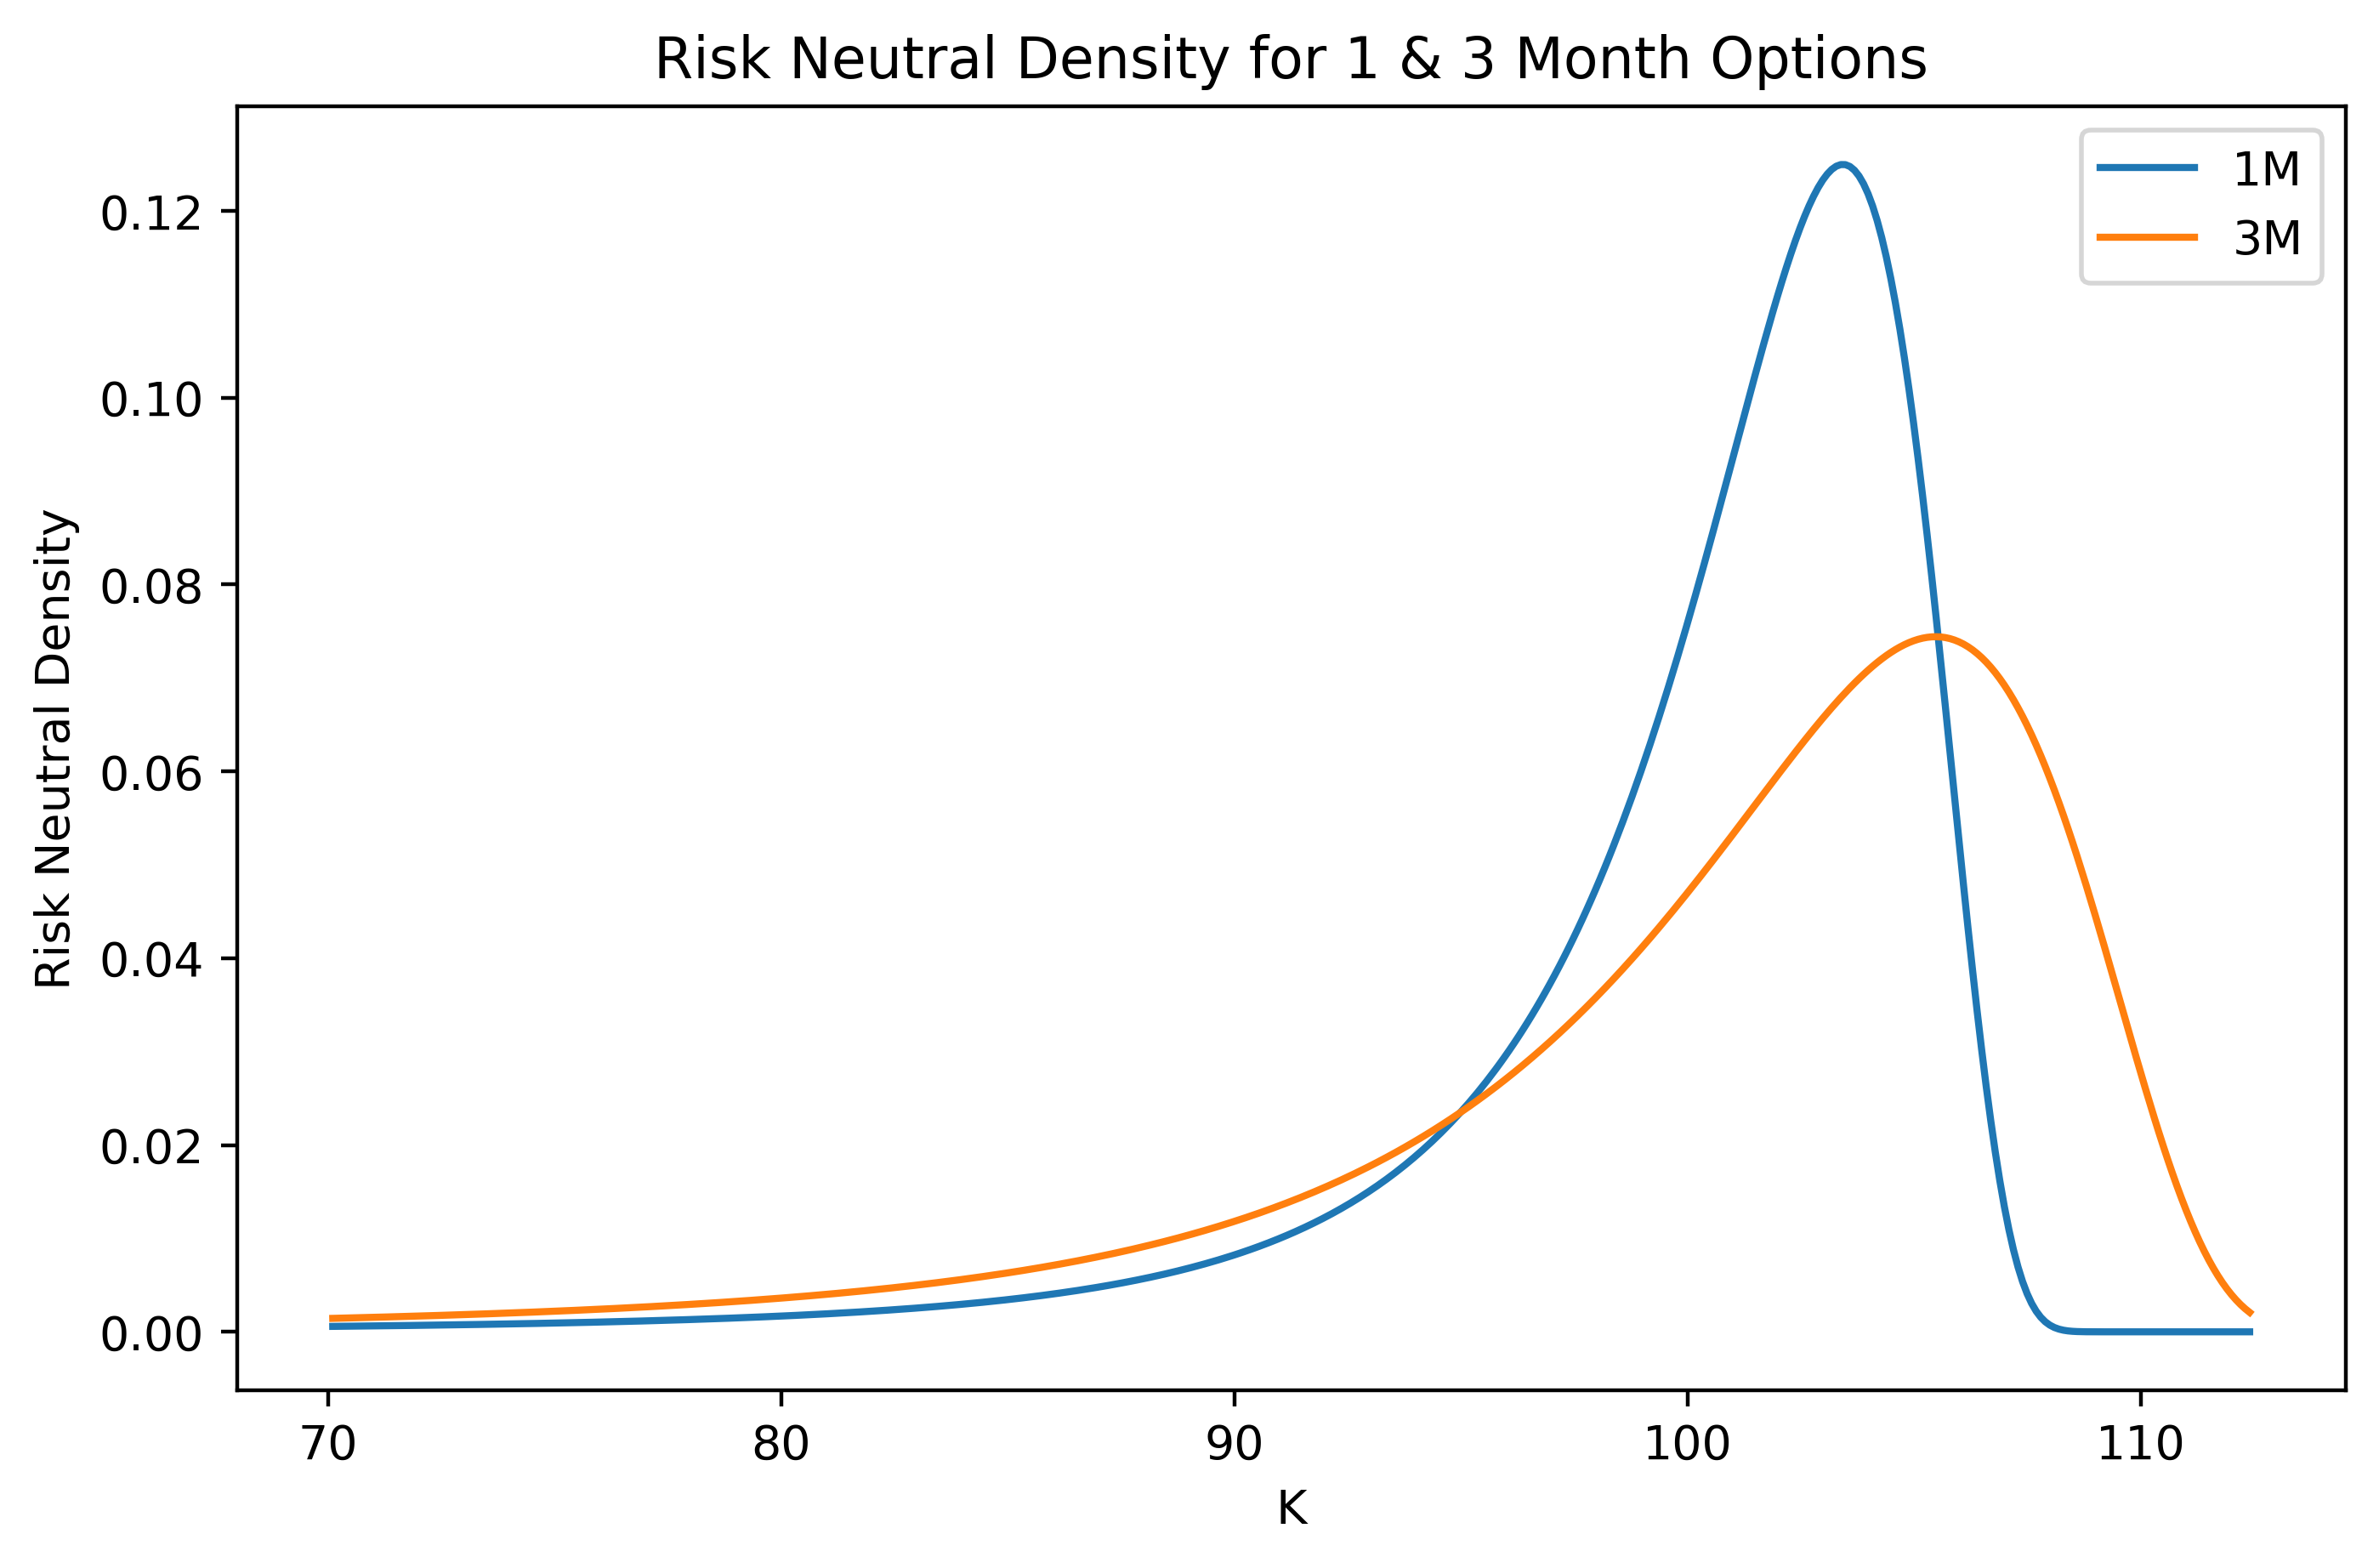

In [4]:
#(c)
def BL_Density (K, vol, T):
    return [(BS_C(K[i-1],vol[i-1],T) - 2*BS_C(K[i],vol[i],T) + BS_C(K[i+1],vol[i+1],T))/0.01 for i in range(1, len(K_list) - 1)]
#h = 0.1
def density_plot(K, density_1, density_3):
    plt.figure(figsize = (8, 5), dpi = 400)
    plt.plot(K[1 : -1], density_1)
    plt.plot(K[1 : -1], density_3)
    plt.legend(['1M', '3M'])
    plt.title("Risk Neutral Density for 1 & 3 Month Options")
    plt.xlabel("K")
    plt.ylabel("Risk Neutral Density")

K_list = np.linspace(70, 112.5, 425)
sig_1 = 1.55779466 - 0.01378846 * K_list
sig_3 = 0.93244064 - 0.00767564 * K_list

density_plot(K_list, BL_Density(K_list, sig_1, 1/12), BL_Density(K_list, sig_3, 3/12))  

## Q1 (c)
Breeden-Litzenberger method:
$$ \phi(K) ≈ \frac{C(K − h) − 2C(K) + C(K + h)}{h^{2}}$$
They are increasing first and then decreasing after K hits certain levels.

Both densities skew to left, 3M density has fatter tails, 1M density has higher kurtosis. 

$\frac{∂^{2}C}{∂K^{2}}$ is the second derivative of C(K). It represents how C increases as K increases.

This is what I would expect to see.
 

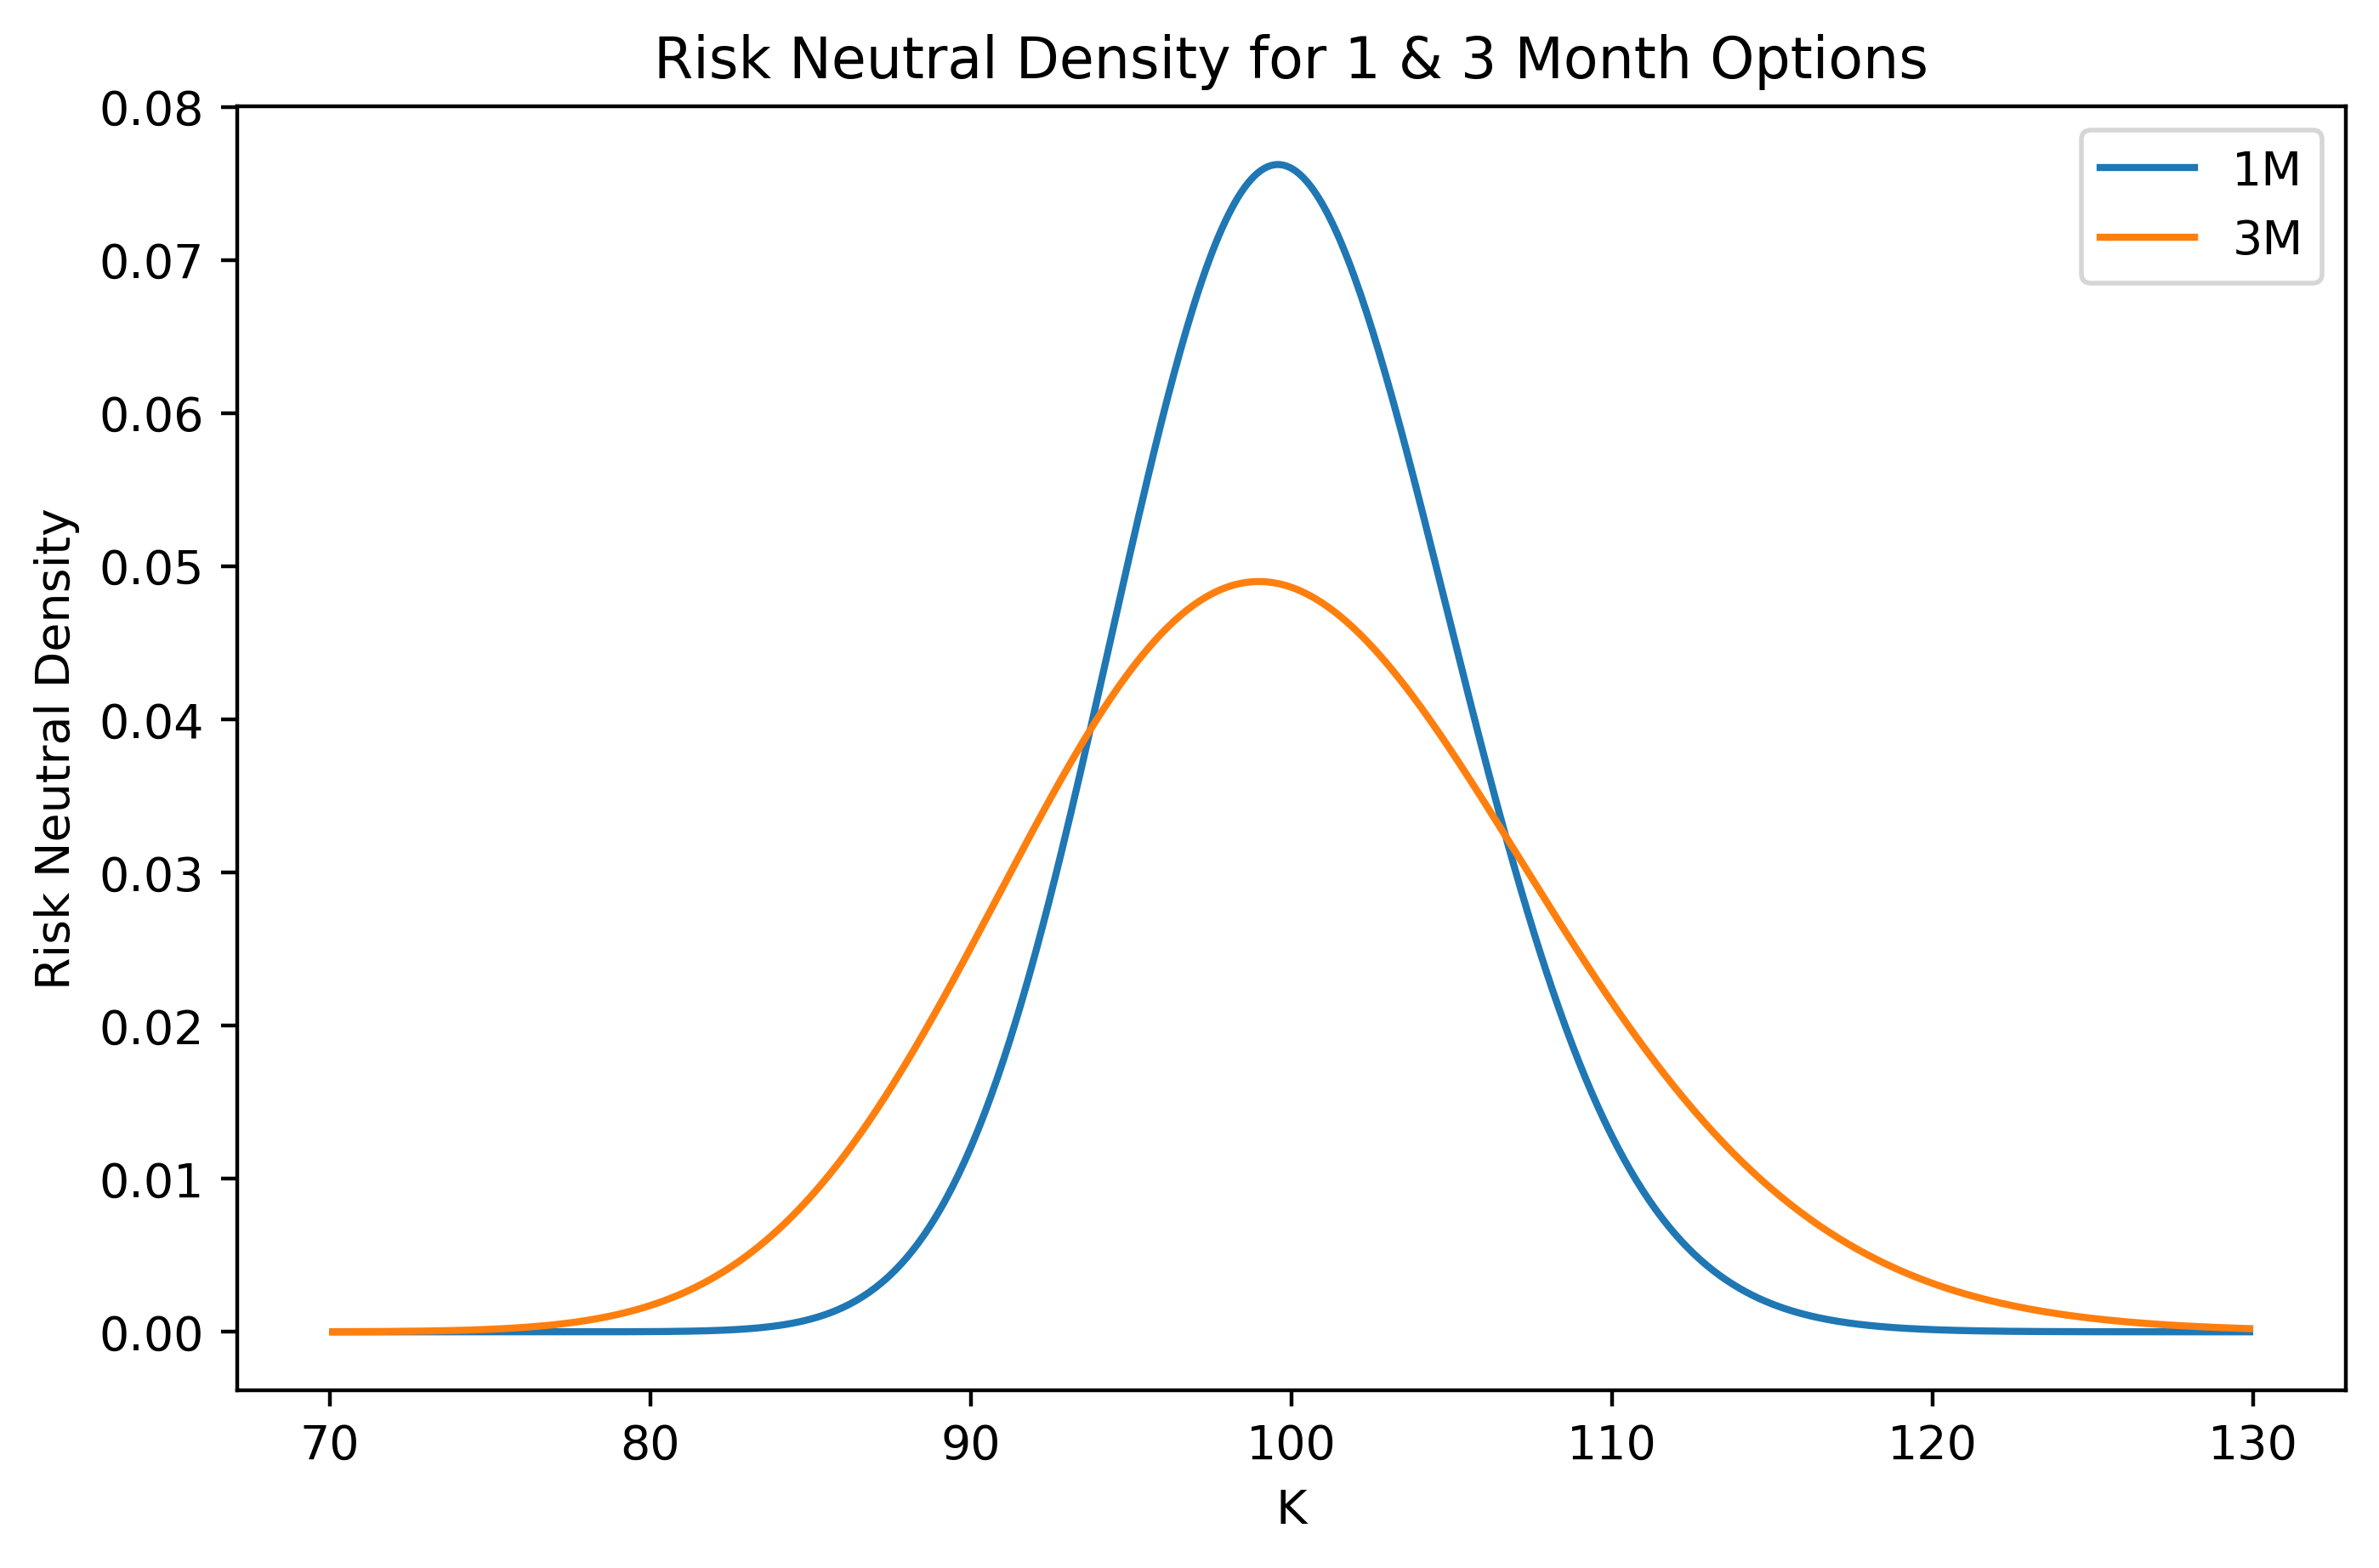

In [5]:
#(d)
def BL_Density_d(K, vol, T):
    return [(BS_C(K[i-1],vol,T) - 2*BS_C(K[i],vol,T) + BS_C(K[i+1],vol,T))/0.01 for i in range(1, len(K) - 1)]
#h = 0.1
K_list2 = np.linspace(70, 130, 600)
density_plot(K_list2, BL_Density_d(K_list2, 0.1824, 1/12), BL_Density_d(K_list2, 0.1645, 3/12))

## Q1 (d)
In comparison with (c), these two risk neutral densities have no skewness.

In [6]:
#(e) 
def M1Put(density, S): return sum(density[i] * (S[i]<=110) * 0.1 for i in range(len(S) - 2))
#底部宽度 h=0.1, 高度为density[i]*1 但是需要确定是否加上这个值
def M2Call(density, S): return sum(density[i] * (S[i]>=105) * 0.1 for i in range(len(S) - 2))

def M3Call(density, S): return sum(density[i] * max(0, S[i] - 100) * 0.1 for i in range(len(S) - 2))
#底部宽度 h=0.1, 高度为density[i] * max(S-K,0)

density_1, density_3 = BL_Density(K_list, sig_1, 1/12), BL_Density(K_list, sig_3, 3/12)
density_2 = BL_Density(K_list, (sig_1 + sig_3)/2, 2/12)
S = np.linspace(70, 112.5, 425)
    
print(M1Put(density_1,S), M2Call(density_3,S), M3Call(density_2,S))

0.9945910044720566 0.31753676678299064 2.7398830243714474


## Question 2
**Option Pricing via FFT Techniques The Heston Model is defined by the following system of stochastic differential equations:**
$$dS_{t}=rS_{t}dt+\sqrt{v_{t}}S_{t}dW_{t}^{1} $$
$$dv_{t}=\kappa(\theta-v_{t})dt+\sigma\sqrt{v_{t}}dW_{t}^{2}$$
$$Cov(dW_{t}^{1}, dW_{t}^{2})=\rho dt $$
**The characteristic function for the Heston Model is known to be:**
$$w(u)=\frac{exp(iuln(S_{0}))+iu(r-q)t+\frac{\kappa\theta t(\kappa-i\rho\sigma u)}{\sigma^{2}}}{(cosh(\frac{\lambda t}{2})+\frac{\kappa-i\rho\sigma u}{\lambda}sinh(\frac{\lambda t}{2}))^{\frac{2\kappa\theta}{\sigma^{2}}}} $$
$$\Psi(u)=w(u)exp(\frac{-(u^{2}+iu)v_{0}}{\lambda coth(\frac{\lambda t}{2})+\kappa-i\rho\sigma u}) $$
$$\lambda = \sqrt{\sigma^{2}(u^{2}+iu)+(\kappa-i\rho\sigma u)^{2}} $$
**r = 1.5%, q = 1.77%, S0 = 267.1** <p>
In order to prevent arbitrage in our data, we must have:
1. Call (put) prices that are monotonically decreasing (increasing) in strike.
2. Call (put) prices whose rate of change is greater than 0 (-1) and less than 1 (0)
3. Call and put prices that are convex with respect to changes in strike.
4. As a general rule, I also tend to discard one-sided quotes (that is, with 0 bid or offer).

In [15]:
df = pd.read_excel('mf796-hw3-opt-data.xlsx')
df

,expDays,expT,K,call_bid,call_ask,put_bid,put_ask
0,49,0.134155,240,29.52,29.74,1.52,1.54
1,49,0.134155,245,24.87,25.09,1.89,1.91
2,49,0.134155,250,20.36,20.55,2.38,2.40
3,49,0.134155,255,16.02,16.19,3.03,3.07
4,49,0.134155,260,11.95,12.08,3.94,3.98
5,49,0.134155,265,8.27,8.33,5.24,5.28
6,49,0.134155,270,5.10,5.16,7.08,7.14
7,49,0.134155,275,2.71,2.74,9.67,9.82
8,49,0.134155,280,1.22,1.24,13.25,13.49
9,140,0.383299,220,50.04,50.31,2.44,2.46


In [14]:
call = df[['expDays', 'expT', 'K', 'call_bid', 'call_ask']].copy()
put  = df[['expDays', 'expT', 'K', 'put_bid', 'put_ask']].copy()

call['mid_price'] = (call['call_ask'] + call['call_bid'])/2
call['spread'] = call['call_ask'] - call['call_bid']

put['mid_price'] = (put['put_ask'] + put['put_bid'])/2
put['spread'] = put['put_ask'] - put['put_bid']

call

,expDays,expT,K,call_bid,call_ask,mid_price,spread
0,49,0.134155,240,29.52,29.74,29.630,0.22
1,49,0.134155,245,24.87,25.09,24.980,0.22
2,49,0.134155,250,20.36,20.55,20.455,0.19
3,49,0.134155,255,16.02,16.19,16.105,0.17
4,49,0.134155,260,11.95,12.08,12.015,0.13
5,49,0.134155,265,8.27,8.33,8.300,0.06
6,49,0.134155,270,5.10,5.16,5.130,0.06
7,49,0.134155,275,2.71,2.74,2.725,0.03
8,49,0.134155,280,1.22,1.24,1.230,0.02
9,140,0.383299,220,50.04,50.31,50.175,0.27


In [9]:
def monotonicity(typ, mid_price):
    #Call should be decreasing, everytime new min, Put should be increasing, everytime new max
    return all(mid_price == mid_price.cummin()) if typ == 'call' else all(mid_price == mid_price.cummax())

def rate_change(typ, mid_price, k):
    # rate = \frac{\delta price}{\delta k}
    if typ == 'call':
        r = (mid_price.shift(1) - mid_price) / (k.shift(1) - k)
        r = r.dropna().values
        return all(i > -1 and i < 0 for i in r)
    else:
        r = (mid_price.shift(1) - mid_price) / (k.shift(1) - k)
        r = r.dropna().values
        return all(i > 0 and i < 1 for i in r)
        
def convexity(p):
    n = p - 2*p.shift(1) + p.shift(2)
    n = n.dropna().values
    return all(i>0 for i in n)

In [10]:
print(monotonicity('call', call["mid_price"][0:9]),end=' ')
print(monotonicity('call', call["mid_price"][9:25]),end=' ')
print(monotonicity('call', call["mid_price"][25:]),end=' ')
print(monotonicity('put', put["mid_price"][0:9]),end=' ')
print(monotonicity('put', put["mid_price"][9:25]),end=' ')
print(monotonicity('put', put["mid_price"][25:]))
    
print(rate_change('call', call["mid_price"][0:9],call["K"][0:9]),end=' ')
print(rate_change('call', call["mid_price"][9:25],call["K"][9:25]),end=' ')
print(rate_change('call', call["mid_price"][25:],call["K"][25:]),end=' ')
print(rate_change('put', put["mid_price"][0:9],put["K"][0:9]),end=' ')
print(rate_change('put', put["mid_price"][9:25],put["K"][9:25]),end=' ')
print(rate_change('put', put["mid_price"][25:],put["K"][25:]))
    
print(convexity(call["mid_price"][0:9]),end=' ')
print(convexity(call["mid_price"][9:25]),end=' ')
print(convexity(call["mid_price"][25:]),end=' ')
print(convexity(put["mid_price"][0:9]),end=' ')
print(convexity(put["mid_price"][9:25]),end=' ')
print(convexity(put["mid_price"][25:]))

True True True True True True
True True True True True True
True True True True True True


## Q2 (a)
There is no arbitrage opportunities at the mid.

There is no arbitrage opportunities either after accounting for the bidask spread.

In [128]:
#(b)
class FFT:
    def __init__(self, lst, data, S0):
        self.sigma = lst[0]
        self.eta0 = lst[1]
        self.kappa = lst[2]
        self.rho = lst[3]
        self.theta = lst[4]
        self.S0 = S0
        self.r = 0.015 
        self.q = 0.0177
        self.T = 0.25
        self.data = data

    def Heston_cf(self, u): 
        """Heston model characteristic function """
        i = complex(0,1)
        lam = np.sqrt(self.sigma**2*(u**2+i*u)+(self.kappa-i*self.rho*self.sigma*u)**2)
        w = np.exp(i*u*np.log(self.S0)+i*u*(self.r-0)*self.T+self.kappa*self.theta*self.T*\
        (self.kappa-i*self.rho*self.sigma*u)/self.sigma**2)/(np.cosh(lam*self.T/2)+(self.kappa-\
        i*self.rho*self.sigma*u)/lam*np.sinh(lam*self.T/2))**(2*self.kappa*self.theta/self.sigma**2)
        Psi = w*np.exp(-(u**2+i*u)*self.eta0/(lam/np.tanh(lam*self.T/2)+self.kappa-i*self.rho*self.sigma*u))
        return Psi

    def dirac(self, n):
        """define a dirac delta function"""
        y = np.zeros(len(n), dtype = complex)
        y[n==0] = 1
        return y

    def Heston_fft(self, alpha, n, upper_bound, K):
        N = 2 ** n
        delta_v = upper_bound / N
        delta_k = 2 * np.pi / N / delta_v

        J = m = np.arange(1, N+1, dtype = complex)

        Beta = np.log(self.S0) - delta_k * N / 2
        km = Beta + (m-1) * delta_k
        vj = (J-1) * delta_v #[nodes]
        i = complex(0,1)

        Psi_v = np.zeros(len(J), dtype = complex)
        for ii in range(N):
            u = vj[ii] - (alpha + 1) * i
            Psi_v[ii] = self.Heston_cf(u) / ((alpha + vj[ii] * i) * (alpha + 1 + vj[ii] * i))

        # compute FFT
        xj = (delta_v/2) * Psi_v * np.exp(-i * Beta * vj) * (2 - self.dirac(J-1))
        yj = np.fft.fft(xj)        
        
        # calculate option price
        CT_kj = np.exp(-alpha * np.array(km)) / np.pi * np.array(yj).real
        k_List = list(Beta + (np.cumsum(np.ones((N, 1))) - 1) * delta_k)
        Kt = np.exp(np.array(k_List)) # Real strike price K
        return np.exp(-self.r * self.T) * interpolate.splev(K, interpolate.splrep(Kt, np.real(CT_kj))).real
        
    def obj_fxn(self, lst):
        self.sigma = lst[0]
        self.eta0  = lst[1]
        self.kappa = lst[2]
        self.rho   = lst[3]
        self.theta = lst[4]
        self.T = self.data['expT_call'][0]

        c = self.data["mid_price_call"][0:9]
        p = self.data["mid_price_put"][0:9]
        k = self.data["K_call"][0:9].values
        return sum((self.Heston_fft(1., 11, 1000, k[i]) - c[i])**2 + (self.Heston_fft(-1.5, 11, 1000, k[i]) - p[i])**2 \
         for i in range(len(k)))/9
        
    def inverse_weights(self, lst):
        self.sigma = lst[0]
        self.eta0  = lst[1]
        self.kappa = lst[2]
        self.rho   = lst[3]
        self.theta = lst[4]
        self.T = self.data['expT_call'][0]

        c = self.data["mid_price_call"][0:9]
        p = self.data["mid_price_put"][0:9]
        k = self.data["K_call"][0:9].values
        w = 1 / self.data['spread_call']
        return sum(w[i] * ((self.Heston_fft(1., 11, 1000, k[i]) - c[i])**2 + (self.Heston_fft(-1.5, 11, 1000, k[i]) - p[i])**2) \
         for i in range(len(k)))/(9)

In [129]:
lst = [1.5, 0.1, 0.25, -0.5, 0.1]
bound = [(0.001, 5.0), (0.0, 2.0), (0.0, 2.0), (-1, 1), (0.0, 1.0)]
opt_data = call.join(put, lsuffix = '_call', rsuffix = '_put')[['expT_call', 'mid_price_call', 'mid_price_put', 'K_call', 'spread_call']]
F = FFT(lst, opt_data, 267.15)
F.obj_fxn(lst)

29.520248461645046

In [40]:
res = minimize(F.obj_fxn, lst, bounds = bound)

In [42]:
res

      fun: 0.30804599077998795
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00148631,  0.01793248, -0.00130162, -0.00527945, -0.00077925])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 486
      nit: 60
     njev: 81
   status: 0
  success: True
        x: array([ 1.89434933e+00,  3.55562181e-04,  7.25836463e-01, -7.65112800e-01,
        7.96965206e-01])

In [79]:
lst2 = [2.5, 0.2, 0.5, 0.5, 0.2]
results = minimize(F.obj_fxn, lst2, bounds = bound)

In [81]:
results

      fun: 0.30808538669402363
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00060515,  0.00529556, -0.00085845, -0.00123101, -0.00029264])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 552
      nit: 77
     njev: 92
   status: 0
  success: True
        x: array([ 1.89082011e+00,  1.79775789e-04,  6.21795290e-01, -7.65091406e-01,
        9.29770740e-01])

In [0]:
bound2 = [(0.01, 3.0), (0.01, 1.0), (0.0, 1.0), (-1, 1.5), (0.0, 2.0)]
results = minimize(F.obj_fxn, lst2, bounds = bound2)

In [85]:
results

      fun: 0.30808538669402363
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00060515,  0.00529556, -0.00085845, -0.00123101, -0.00029264])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 552
      nit: 77
     njev: 92
   status: 0
  success: True
        x: array([ 1.89082011e+00,  1.79775789e-04,  6.21795290e-01, -7.65091406e-01,
        9.29770740e-01])

In [86]:
results = minimize(F.obj_fxn, lst, bounds = bound2)

In [87]:
results

      fun: 0.3081720816697449
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.91033910e-06,  5.91169225e-02, -4.86871652e-04,  1.73194791e-06,
        1.87350136e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 258
      nit: 35
     njev: 43
   status: 0
  success: True
        x: array([ 1.68615558,  0.01      ,  1.        , -0.76250941,  0.44283047])

| *Starting Points* | Lower | Upper | MSE | Calibrated |
|     ---    |     ---       |     ---      |     ---       |     ---      | 
| **[1.5, 0.1, 0.25, -0.5, 0.1]** | [0.001, 0.0, 0.0, -1, 0.0] | [5.0, 2.0, 2.0, 1.0, 1.0] | 0.30804599077998795 | [ 1.894, 3.555e-04,  7.258e-01, -7.651e-01, 7.969e-01] |
| **[2.5, 0.2, 0.5, 0.5, 0.2]** | [0.001, 0.0, 0.0, -1, 0.0] | [5.0, 2.0, 2.0, 1.0, 1.0] | 0.30808538669402363 | [ 1.890, 1.797e-04, 6.217e-01, -7.650e-01, 9.297e-01] |
| **[2.5, 0.2, 0.5, 0.5, 0.2]** | [0.01, 0.01, 0.0, -1, 0.0] | [3.0, 1.0, 1.0, 1.5, 2.0] | 0.30808538669402363 | [1.890, 1.797e-04, 6.217e-01, -7.650e-01, 9.297e-01] |
| **[1.5, 0.1, 0.25, -0.5, 0.1]** | [0.01, 0.01, 0.0, -1, 0.0] | [3.0, 1.0, 1.0, 1.5, 2.0] | 0.3081720816697449 | [1.686, 0.01, 1., -0.7625, 0.442] |

# Q2 (c)
As shown above, the results with respect to the bound set 1&2, starting points 1&2.
The optimal set of parameters doesn't change with changes in starting points and bounds. The calibrated values change a bit but not significant.
This shows a good stability of this calibration algorithm.

In [130]:
F.inverse_weights(lst)

595.0571976447462

In [131]:
res = minimize(F.inverse_weights, lst, bounds = bound)

In [132]:
res

      fun: 4.156373149786322
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00020179,  0.04356826,  0.00051497,  0.00096776,  0.00319362])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 648
      nit: 87
     njev: 108
   status: 0
  success: True
        x: array([ 1.71173421,  0.        ,  0.5607828 , -0.7916682 ,  0.9999665 ])

## Q2 (d)
The calibrated results are similar as the equal weights one, but the squared errors of inverse weights is 4.156373149786322 which is way larger than previous one.
$$ w_{\tau,K} = \frac{1}{c_{\tau,K,ask} - c_{\tau,K,bid}} $$
weights are inversely proportional to spread, smaller spread gives larger weights.

## Question 3

In [78]:
def BS(K, S0, sigma, r, q, T):
    d1 = (np.log(S0/K) + (r - q + sigma**2/2) * T) / (sigma*T**0.5)
    d2 = d1 - sigma * T ** 0.5
    return(si.norm.cdf(d1) * S0 - si.norm.cdf(d2) * K * np.exp(-r*T))
    
S0 = 267.15
r = 0.015
q = 0.0177
T = 0.25
K = 275
alpha = 1.
n = 12
B = 1000
lst = [1.17, 0.034, 3.51, -0.77, 0.052]

sig = root(lambda sig: BS(K, S0, sig, r, q, T) - FFT(lst, opt_data, S0).Heston_fft(alpha, n, B, K), 0.3).x[0]

delta_hes = (FFT(lst, opt_data, S0+0.01).Heston_fft(alpha, n, B, K)-FFT(lst, opt_data, S0-0.01).Heston_fft(alpha, n, B, K))/0.02
d1 = (np.log(S0/K) + (r - q + sig**2/2) * T) / (sig*T**0.5)
delta_bs = np.exp(-q * T) * si.norm.cdf(d1)

print(delta_hes, delta_bs)

0.5129216016249494 0.35488181296377186


## Q3 (a)
∆Heston = 0.51, ∆Black-Scholes = 0.35<p>
The delta in Heston model and the delta in the Black-Scholes model are different. It's because stochastic volatility will affect delta. Heston model is better because it considers the effect of volatility on the option price. The impact of volatility in Heston model is a bit smaller.<p>

Long one unit of the call gives a delta of $∆Call$, to make the portfolio delta neutral, we need to short $∆Call$ units of the underlying asset that gives a delta of $−∆Call$.

In [80]:
# b
dv = 0.05 * 0.034
lstP = [1.17, 0.034+dv, 3.51, -0.77, 0.052+dv]
lstM = [1.17, 0.034-dv, 3.51, -0.77, 0.052-dv]
vega_heston = (FFT(lstP, opt_data, S0).Heston_fft(alpha, n, B, K) - FFT(lstM, opt_data, S0).Heston_fft(alpha, n, B, K))/(2*dv)
vega_bs = np.exp(-q * T) * S0 * np.sqrt(T) * si.norm.cdf(d1)
print(vega_heston, vega_bs)

136.09434546527305 47.40333816663581


## Q3 (b)
Vega of BS is 136.09434546527305, Vega of Heston is 47.40333816663581

The Vega in Heston model and the Vega in Black-Scholes model are different. It's because the Vega is impacted if $\rho<0$.

If the $\rho$ is negative, the underlying asset and the volatility has a negative relationship in the Heston model. It means that the option price calculated in Heston model increases a bit less than the Black-Scholes model given the same increase in the volatility.